Notebook showing usage of the data detective package.

**References**
* https://facebook.github.io/prophet/

In [1]:
import detective.core as detective
import detective.helpers as helpers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To load from a local db, we just need the path

In [2]:
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'
DB_URL = 'sqlite:////' + db_path

Alternatively, to load from a cloud database we load from a json file containing the url as the url contains our credentials and we want to lkeep these a secret. To learn how the Google CLoud SQL recorder can be setup checkout https://github.com/robmarkcole/HASS-Google-Cloud-SQL

In [3]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = helpers.load_url(filename)

## Load the db data

We use the DataParser class to load data from the database. This class performs the SQL queries and parses the returned data.

In [4]:
%%time
parser = detective.DataParser(DB_URL)

/Users/robincole/Documents/Github/HASS-data-detective/detective/core.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sensors_df['state'] = sensors_df['state'].astype('float')


CPU times: user 9.17 s, sys: 2.15 s, total: 11.3 s
Wall time: 1min 21s


We can access the list of sensor entities using the list_sensors attribute

In [5]:
parser.list_sensors[0:10]

['sensor.bme680humidity',
 'sensor.bme680pressure',
 'sensor.next_train_in',
 'sensor.living_room_temperature',
 'sensor.darksky_sensor_temperature',
 'sensor.mean_temperature',
 'sensor.bme680temperature',
 'sensor.bedroom_temperature',
 'sensor.next_train_to_wim',
 'sensor.network_up']

Now lets look at the dataframe

In [6]:
sensors_df = parser.get_sensors
sensors_df.head()

entity,sensor.bayes_probability,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.cpu_load_total,sensor.darksky_sensor_precip_probability,...,sensor.mean_temperature,sensor.memory_usage_real,sensor.network_up,sensor.next_train_in,sensor.next_train_to_wim,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.time_in_bed,sensor.volume_used_volume_1,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2018-01-23 07:16:58.762162,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,7.16,19.7,38.0
2018-01-23 07:16:58.910505,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:16:59.094701,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.256479,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.484865,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0


Lets now check for correlations in the data using the all_corrs() method

In [7]:
corrs = parser.get_corrs

In [8]:
corrs[(corrs['value'] > 0.5) | (corrs['value'] < -0.5)]

,value
sensor.next_train_in-sensor.next_train_to_wim,0.980098
sensor.bedroom_temperature-sensor.mean_temperature,0.869004
sensor.hall_temperature-sensor.mean_temperature,0.780510
sensor.blink_blink_camera_percy_temperature-sensor.mean_temperature,0.741195
sensor.blink_blink_camera_percy_temperature-sensor.bedroom_temperature,0.731286
sensor.living_room_temperature-sensor.mean_temperature,0.730015
sensor.bedroom_temperature-sensor.living_room_temperature,0.580394
sensor.hall_temperature-sensor.blink_blink_camera_percy_temperature,0.506711
sensor.hall_temperature-sensor.darksky_sensor_precip_probability,-0.526107
sensor.robins_iphone_battery_level-sensor.home_to_waterloo,-0.567639


Unsurprisingly the mean temperature is strongly correlated with all of the temperature sensors. 

Interestingly my iphone battery level is somewhat inversely correlated with the travel time from home to waterloo, which gets longer late at night when my battery level is more likely to be low. 

#### Plot a single sensor
Convenience to plot a single sensor.

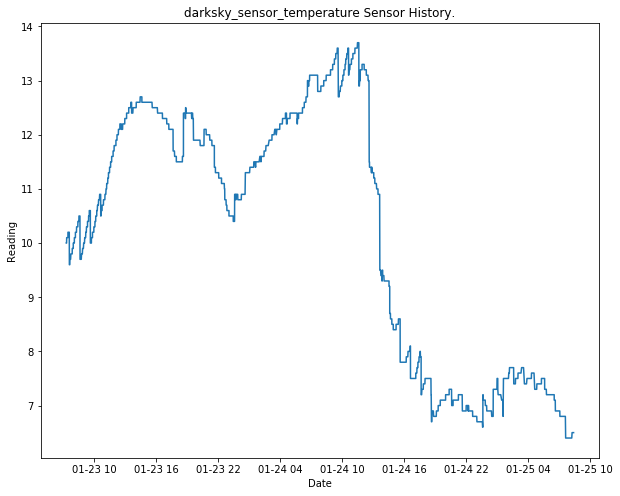

In [9]:
sensor = 'sensor.darksky_sensor_temperature'
parser.plot_sensor(sensor)

Equivalent to

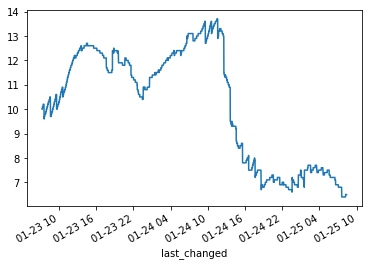

In [15]:
sensors_df[sensor].plot();

#### Pairplot
A seaborn pair plot to show correlations.

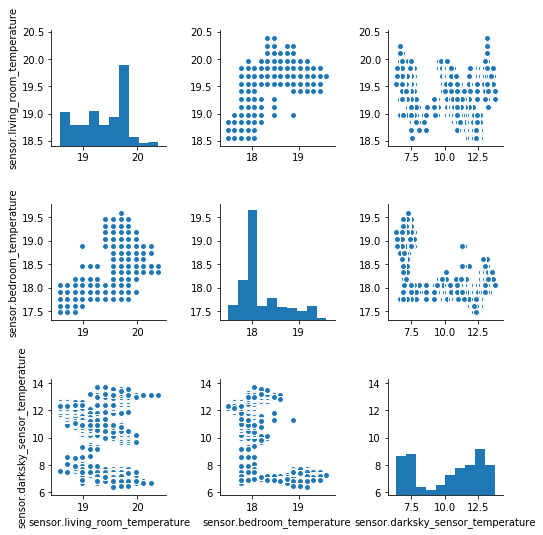

In [10]:
parser.sensor_pairplot(['sensor.living_room_temperature',
                        'sensor.bedroom_temperature',
                        'sensor.darksky_sensor_temperature'])

#### Prediction with prophet
Lets do some forecasting using prophet.

In [11]:
%%time
sensor = 'sensor.darksky_sensor_temperature'
model, future = parser.prophet_model(sensor, periods=365, freq='H')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


CPU times: user 10 s, sys: 133 ms, total: 10.2 s
Wall time: 11.2 s


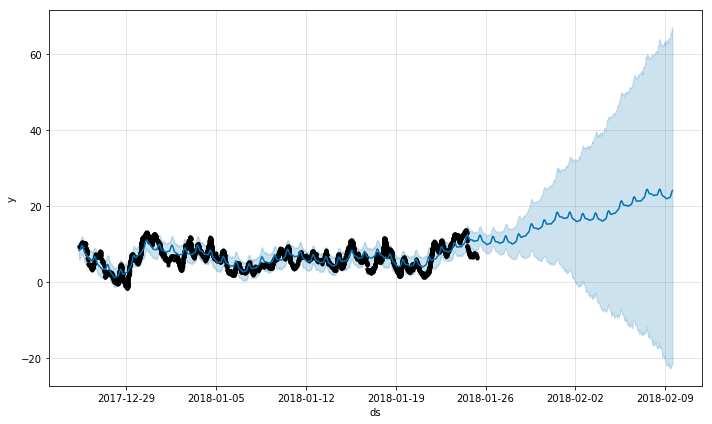

In [12]:
model.plot(future)
plt.show()

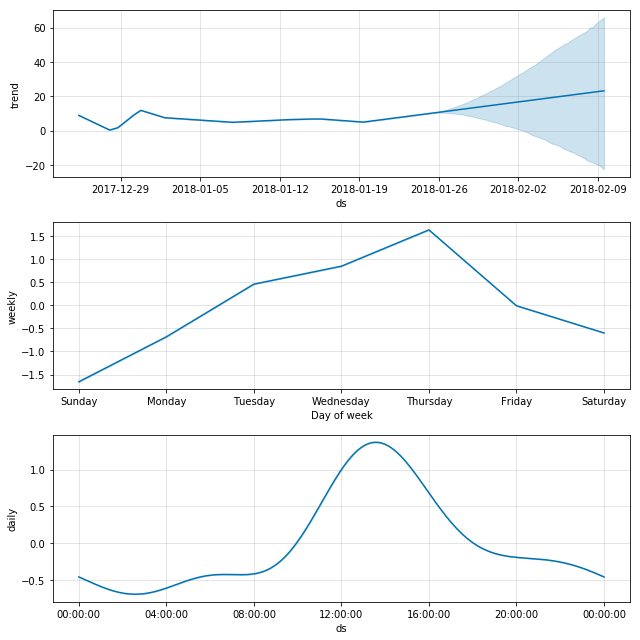

In [13]:
model.plot_components(future)
plt.show()

Clearly the daily trend is for the warmest temperatures at early afternoon